# Project for Data Mining - Smoking Classifier based on Global Coffee Health

## Agampreet Bajaj

## What are we solving?
We are trying to predict wether someone is a smoker or not based on their demographic, lifestyle, and any features related to their health. This problem is very inclusive to the world because of the incredible number of smokers in the world, even though it can cause a lot of damage. Smoking leads to heart disease, cancer, and respiratory issues. If we are able to identify patterns amongst smokers, it can help people or even health organizations understand the factors better. Smoking can cause addiction to nicotine, which can lead to poor sleep, high stress, and less physical activity.

## What is the data?
The data is from [Kaggle](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset) and gives information about Global Coffee Health, including smoking. It provides demographic features (age, gender, country, occupation), lifestyle features (coffee intake, caffeine, sleep, stress, physical activity, alcohol consumption), and health-related features (BMI, heart rate, health issues). The dataset contains 10,000 synthetic records that reflect real-world patterns across 20 countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("synthetic_coffee_health_10000.csv")
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [3]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Looking at this spread, we can see the ages range from 18 to 80, which is a good range of ages to look at for smoking issues. 8+ cups of coffee seems like it is way too much, so there might be an outlier near the end of the coffee intake range. A mean of 6.6 hours of sleep seems reasonable, especially in this day and age. This data also takes into account all shapes of people, as the BMI range is 15 to 38. But a drastic thing we can see is that the smoking column shows 20% of examples to be smokers, which means we will have a major class imbalance in non-smokers and smokers.

Smoking
0    7996
1    2004
Name: count, dtype: int64


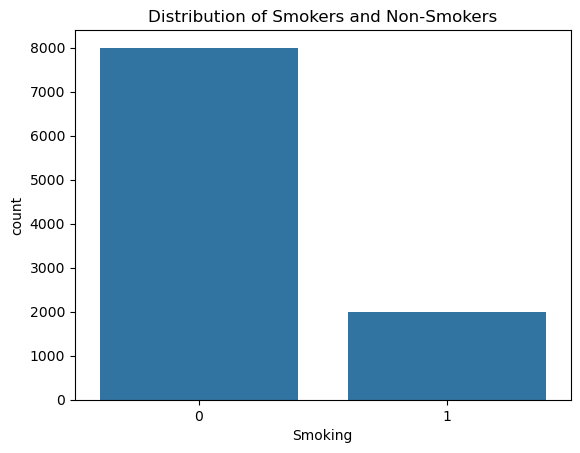

In [4]:
print(df['Smoking'].value_counts())
sns.countplot(df, x='Smoking')
plt.title("Distribution of Smokers and Non-Smokers")
plt.show()

Since there is a big imbalance, we must think of ways to mitigate this, with the last solution to take away examples, as we don't want to waste information that will be significant in our problem. One thing we can immediately understand is the use of other metrics rather than accuracy. This is because our model, with this significant imbalance, can predict training examples to be non-smokers and almost always be right. This means accuracy will always be high and will not be good to base our model on. I will not use SMOTE or downsampling here because I don't want to take data away, and also don't want to make synthetic data that doesn't represent the real data well. I also have 20% of my label as smokers, rather than <5%, where SMOTE because a better option. Therefore, I am going to use logistic regression and random forest as my two classifiers because of their parameter called: <code>class_weight = 'balanced'</code> which will balance classes by adding more weight to the minority class, causing heavier punishments to it. It does this with the formula  $$w_j = \frac{n}{k \times n_j}$$. <br>
wj = weight for class j<br>
n = number of samples<br>
k = number of classes<br>
nj = number of samples in class $$j$$

In [5]:
df.isna().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [6]:
print(df['Health_Issues'].unique())
print("Sum of Non-Null Examples:",df['Health_Issues'].value_counts().sum())

[nan 'Mild' 'Moderate' 'Severe']
Sum of Non-Null Examples: 4059


So we can see that the only null values in our dataset are from the health issues feature. This is very bad, as the amount of null is about 59.41% of the feature, meaning imputation can be extremely risky here. It can give us values that might not make sense, or too many of the same values in many of the examples. Because of this, I printed the unique values that the feature had. I am going to drop this full feature, and let me explain why. We already know the null values are over half the examples, but it is also coarsely binned, meaning it talks about health issues in vague terms. Someone's moderate issue or pain could be someone else's severe. Looking back at the data, we have raw values of someone's BMI, Age, Sleep, alcohol consumption, and more. From this, it is well enough to figure out correlations to smoking, and it seems that the health issues feature is more about issues produced by the person themselves.

In [7]:
df = df.drop(columns=['Health_Issues'])
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

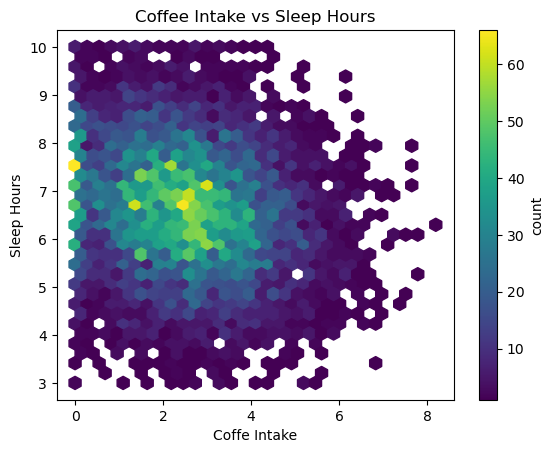

In [25]:
plt.figure()
plt.hexbin(df['Coffee_Intake'], df['Sleep_Hours'], gridsize=30, mincnt=1)
plt.xlabel("Coffe Intake")
plt.ylabel("Sleep Hours")
plt.title("Coffee Intake vs Sleep Hours")
plt.colorbar(label='count')
plt.show()

How a hexagon graph works is it shows the features in an x and y plane, uses colored hexagons showing how many points fall in it. The brighter the color, the more points lie in it. We got a thick cluster at around 1-3 cups and at about 6-8 hours of sleep a day. The coffee intake also has a right tail around 6-8 cups of coffee. This density shows a negative association but it is pretty weak because of the overlap in the amount of points.